## Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Import data

In [2]:
#shortcut to data files
path = r'C:\Users\Sreelaya Narla\Desktop\PYTHON\2025 Instacart Basket Analysis'

In [3]:
# Importing most recent dataframe
final_dataframe = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_exercise_4_9.pkl'))

In [4]:
final_dataframe.shape

(32404859, 34)

In [5]:
final_dataframe.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Last Name,Gender,State,Age,Date Joined,number of dependents,Family Status,Income,merging_status
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


## Creating a histogram
### ques 3

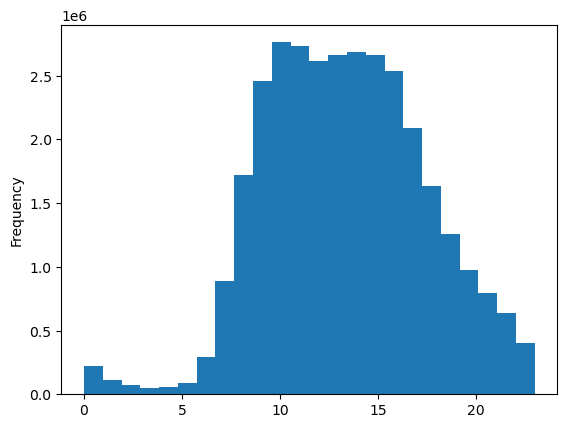

In [19]:
hist = final_dataframe['order_hour_of_day'].plot.hist(bins = 24)

#### observation
##### The histogram shows that customer orders are placed throughout the entire day, but activity significantly increases starting around 7 AM.
Order volume peaks between 10 AM and 3 PM, indicating that this is the most active shopping window. After 4 PM, there's a noticeable decline in order frequency, which continues into the night.

### distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column
#### ques 4

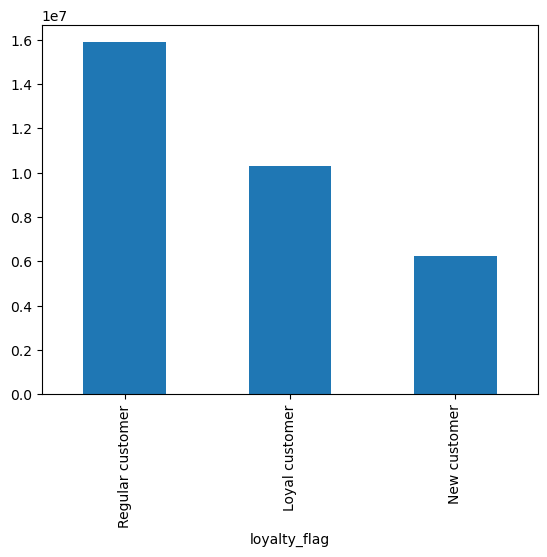

In [18]:
bar_loyaltyflag = final_dataframe['loyalty_flag'].value_counts().plot.bar()

In [8]:
final_dataframe['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

### difference in expenditure 
#### question 5

In [9]:
# Sample the data
sampled_df = final_dataframe.sample(n=100000, random_state=42)

In [10]:
#Aggregate: Mean prices per hour
#Group the data by order_hour_of_day and calculate the average price for each hour
hourly_avg_prices = sampled_df.groupby('order_hour_of_day')['prices'].mean().reset_index()

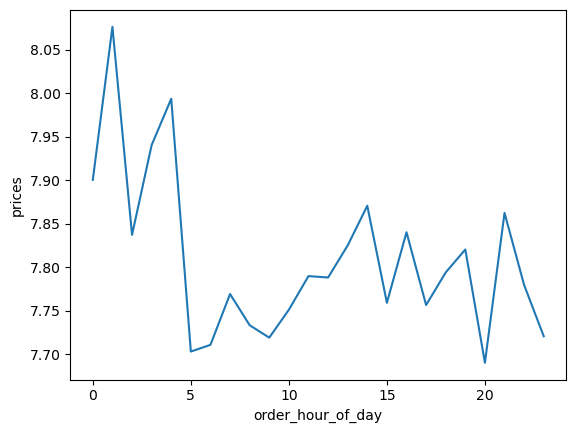

In [17]:
line_price_hod = sns.lineplot(data=hourly_avg_prices, x='order_hour_of_day', y='prices')

### ques 6

In [13]:
sampled_df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'merge_status', 'price_range_loc',
       'busiest_day', 'busiest_days_summary', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'average_spend', 'spender_flag',
       'Customer_frequency', 'frequency_flag', 'First Name', 'Last Name',
       'Gender', 'State', 'Age', 'Date Joined', 'number of dependents',
       'Family Status', 'Income', 'merging_status'],
      dtype='object')

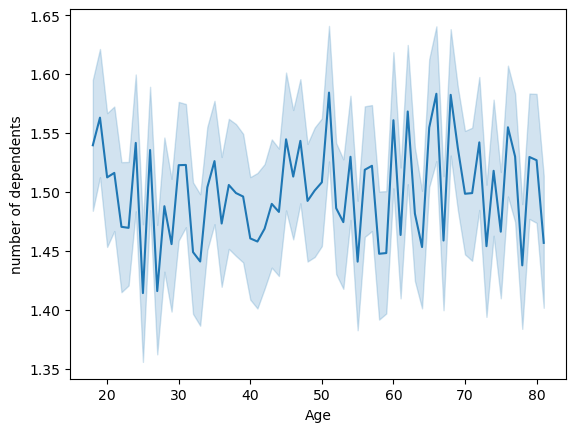

In [16]:
line_age_nod = sns.lineplot(data = sampled_df, x = 'Age', y = 'number of dependents')

#### observation
##### The line chart does not show any clear or consistent relationship between age and number of dependants. The data fluctuates randomly across all age groups, suggesting that age alone is not a strong predictor of how many dependants a customer has.

### ques 7

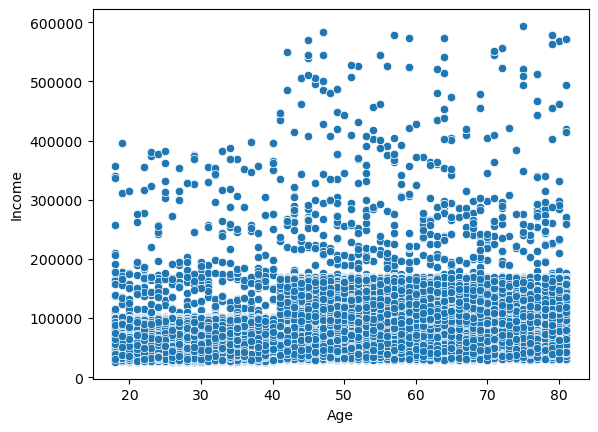

In [15]:
#creating a scatterplot of 'Age' and 'Income'
scatter = sns.scatterplot(x='Age', y='Income', data=sampled_df)

#### observation
##### Overall, there does not appear to be a strong or clear trend linking age directly to income — individuals of all ages can have both low and high incomes.
However, a dense cluster of data points is visible in the lower income range (under $200,000), suggesting that most customers fall into this bracket regardless of age.
There are a few outliers with very high incomes, especially in the 40–70 age range, which could indicate that peak earning years tend to fall in middle age.
This scatterplot can help the marketing team identify income-based segments across age groups for targeted promotions.

### Exporting visualizations

In [20]:
#exporting and saving images
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [21]:
#exporting and saving image
bar_loyaltyflag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [22]:
line_price_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_order_hour_day.png'))

In [23]:
line_age_nod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_number_of_dependents.png'))

In [24]:
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))